In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
!pip install --upgrade openpyxl


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
df = pd.read_excel('/Users/macbook/Documents/GitHub/Statistics_with_Python_G7/Dataset/_205a7d5b6310faf94aa3fc51b5fd16ca_OrderList.xlsx')

In [8]:
df.head()

,Order,Region,Age,Total Sale $
0,1000319,South,39,543.95
1,1002323,South,31,253.78
2,1005101,West,35,556.82
3,1008529,East,41,430.50
4,1008768,East,29,552.30


### 2. The median of "Total Sale $" is larger than the mean. By how much? Round to 2 decimal places.



In [11]:
df['Total Sale $'].median()-df['Total Sale $'].mean()

2.8144133333333343

### 3. What is the standard deviation of Total Sale? Round to 2 decimal places.

In [14]:
df['Total Sale $'].describe()

count    3000.000000
mean      476.690587
std       120.267459
min         0.220000
25%       400.795000
50%       479.505000
75%       552.805000
max       938.310000
Name: Total Sale $, dtype: float64

### 4. What percentage of orders fell within the interquartile range of Total Sale?



In [37]:
sns.palettes.SEABORN_PALETTES

{'deep': ['#4C72B0',
  '#DD8452',
  '#55A868',
  '#C44E52',
  '#8172B3',
  '#937860',
  '#DA8BC3',
  '#8C8C8C',
  '#CCB974',
  '#64B5CD'],
 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'],
 'muted': ['#4878D0',
  '#EE854A',
  '#6ACC64',
  '#D65F5F',
  '#956CB4',
  '#8C613C',
  '#DC7EC0',
  '#797979',
  '#D5BB67',
  '#82C6E2'],
 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'],
 'pastel': ['#A1C9F4',
  '#FFB482',
  '#8DE5A1',
  '#FF9F9B',
  '#D0BBFF',
  '#DEBB9B',
  '#FAB0E4',
  '#CFCFCF',
  '#FFFEA3',
  '#B9F2F0'],
 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'],
 'bright': ['#023EFF',
  '#FF7C00',
  '#1AC938',
  '#E8000B',
  '#8B2BE2',
  '#9F4800',
  '#F14CC1',
  '#A3A3A3',
  '#FFC400',
  '#00D7FF'],
 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'],
 'dark': ['#001C7F',
  '#B1400D',
  '#12711C',
  '#8C0800',
  '#591E71',
  '#592F0D',
  '#A23582',
  '#3C3C3C',
  '#B8850A

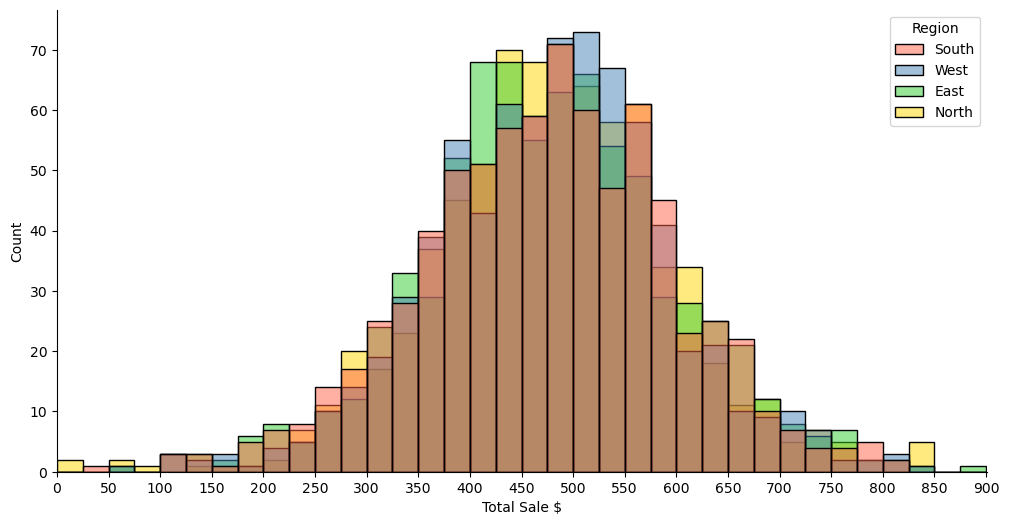

In [67]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.histplot(x = df['Total Sale $'], hue = df['Region'],
             palette = ["#FF6347", "#4682B4", "#32CD32", "#FFD700"], 
             bins = np.arange(0, 901, 25),)
ax.set_xticks(np.arange(0, 901, 50))
ax.set_xlim(0, 901)
sns.despine()

#### 5. Given the limited information you have, your boss wants you to group customers in a meaningful way. You decide to take a look at how the order region impacts things. Calculate the average total sales from the North region only. What is the difference between the North region average total sales and the average total sales across all regions (including the North)? Round to 2 decimal places.

In [25]:
df.groupby(df['Region'])['Total Sale $'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East,755.0,476.013748,124.851016,72.31,402.61,473.050,551.9550,935.69
North,744.0,478.133952,116.507786,0.22,408.69,478.925,552.3125,848.93
South,756.0,474.323492,123.661023,43.45,392.42,478.035,559.5875,937.20
West,745.0,478.337128,115.853308,67.19,401.73,483.530,549.5800,938.31


#### 6. What is the absolute value of difference between the North region median total sales and all orders median total sales (across all regions including the North)?


In [90]:
abs(df_North['Total Sale $'].median()-df['Total Sale $'].median())

0.5799999999999841

#### 7. Next, take a look at customer age. Create 3 age groups: 21-30, 31-40, 41-50. What is the average total sales for the age group with the highest average? Round to 2 decimal places.

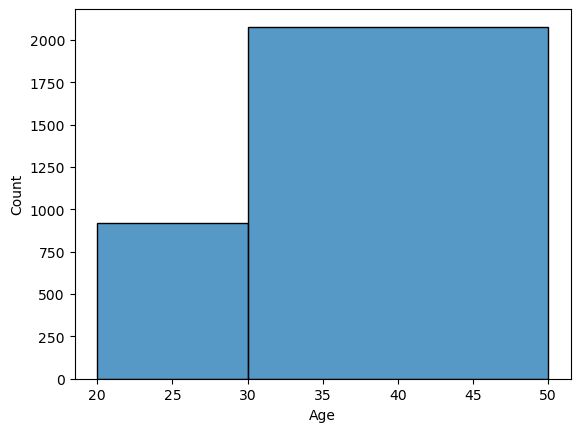

In [130]:
sns.histplot(x = df['Age'], bins = [20, 30, 50]);


In [132]:
df['Age'].describe()

count    3000.000000
mean       35.416333
std         8.675603
min        21.000000
25%        28.000000
50%        35.000000
75%        43.000000
max        50.000000
Name: Age, dtype: float64

In [138]:
pd.cut(df['Age'], bins = [20, 30, 40, 50 ], labels = ['21-30', '31-40', '41-50']).value_counts()

Age
21-30    1000
31-40    1000
41-50    1000
Name: count, dtype: int64

In [106]:
age_21_30 = df[(df['Age']>=21) & (df['Age']<=30)]
age_31_40 = df[(df['Age']>=31) & (df['Age']<=40)]
age_41_50 = df[(df['Age']>=41) & (df['Age']<=50)]

In [73]:
df_East = df[df['Region']=='East']
df_North = df[df['Region']=='North']
df_South = [df['Region']=='South']
df_West = df[df['Region']=='West']

In [140]:
def categorize_age(age):
    if 21 <= age <= 30:
        return '21-30'
    elif 31 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 50:
        return '41-50'
    else:
        return np.nan

# Create the 'age_group' column using apply
df['age_group1'] = df['Age'].apply(categorize_age)

In [142]:
df

,Order,Region,Age,Total Sale $,age_group1
0,1000319,South,39,543.95,31-40
1,1002323,South,31,253.78,31-40
2,1005101,West,35,556.82,31-40
3,1008529,East,41,430.50,41-50
4,1008768,East,29,552.30,21-30
...,...,...,...,...,...
2995,9986453,North,41,295.27,41-50
2996,9987889,West,42,671.26,41-50
2997,9988584,North,23,624.41,21-30
2998,9992389,West,24,743.35,21-30


In [146]:
df.groupby(df['age_group1'])['Total Sale $'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group1,,,,,,,,
21-30,1000.0,494.62254,110.598146,267.98,413.6625,479.265,561.4200,938.31
31-40,1000.0,459.09028,104.344349,0.22,403.1775,479.820,538.4575,675.09
41-50,1000.0,476.35894,140.249711,1.38,386.1750,479.065,571.3400,937.20


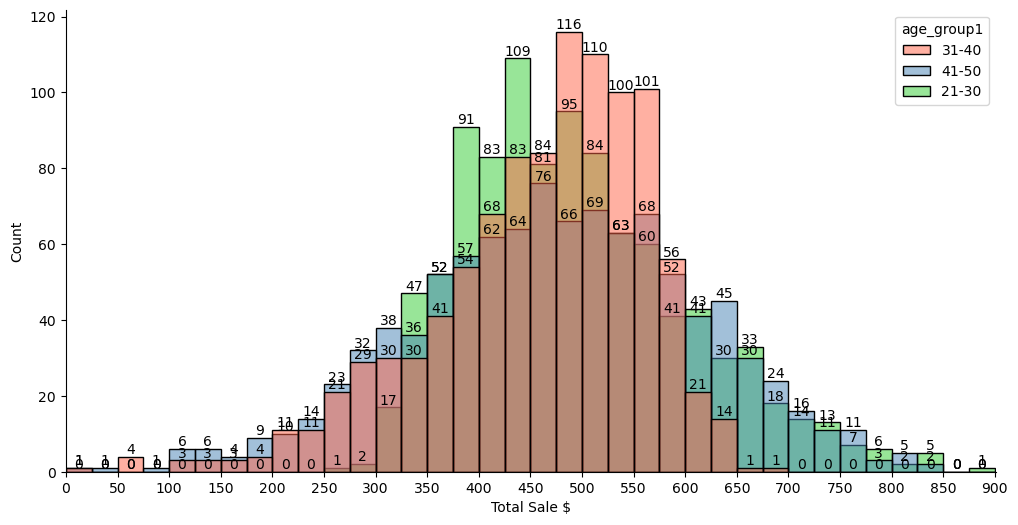

In [162]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.histplot(x = df['Total Sale $'], hue = df['age_group1'],
             palette = ["#FF6347", "#4682B4", "#32CD32", "#FFD700"], 
             bins = np.arange(0, 901, 25),)
ax.set_xticks(np.arange(0, 901, 50))
ax.set_xlim(0, 901)
for i in ax.containers:
    ax.bar_label(i)
# ax.bar_label(ax.containers[1])
sns.despine()